

Target is 630
-----------------------------------
i=3, x=8 (0b1000), predict_y=760
-----------------------------------
i=2, x=12 (0b1100), predict_y=640
-----------------------------------
i=1, x=14 (0b1110), predict_y=580
-----------------------------------
i=0, x=13 (0b1101), predict_y=610


Target is 780
-----------------------------------
i=3, x=8 (0b1000), predict_y=760
-----------------------------------
i=2, x=4 (0b100), predict_y=880
-----------------------------------
i=1, x=6 (0b110), predict_y=820
-----------------------------------
i=0, x=7 (0b111), predict_y=790




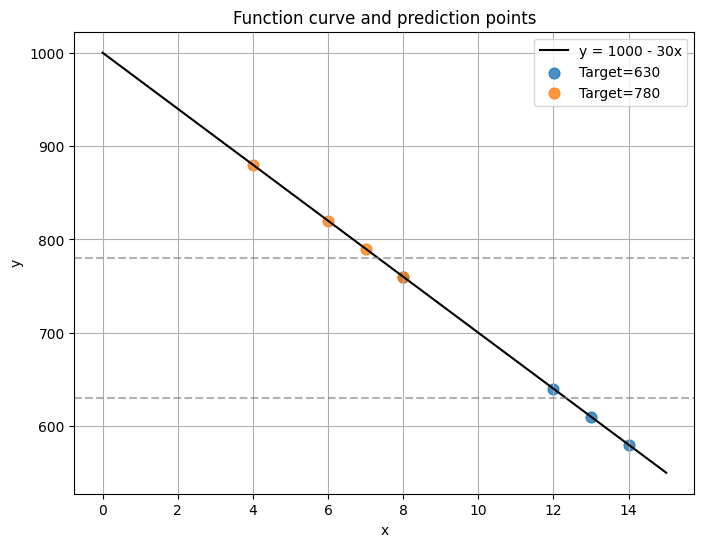

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x_width = 4

def funcn(x):
    y = 1000 - 30 * x
    return y

def predict(target):
    x = 2**(x_width-1)
    x_history = []
    y_history = []
    print("\n")
    print("Target is", target)
    for i in range(x_width-1, -1, -1):
        predict_y = funcn(x)
        x_history.append(x)
        y_history.append(predict_y)
        print("-" * 35)
        print(f"i={i}, x={x} ({bin(x)}), predict_y={predict_y}")
        if predict_y > target:
            x = x + 2**(i-1)
        else:
            x = x - 2**i + 2**(i-1)
    return x_history, y_history

# 兩個 target
targets = [630, 780]
results = {}

for t in targets:
    xh, yh = predict(t)
    results[t] = (xh, yh)

# 產生 funcn 曲線
x_vals = np.linspace(0, 15)
y_vals = funcn(x_vals)

# === 單張圖 ===
print("\n")
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="y = 1000 - 30x", color='black')

# 各 target 的預測點
for t in targets:
    xh, yh = results[t]
    plt.scatter(xh, yh, s=60, label=f"Target={t}", alpha=0.8)
    plt.axhline(y=t, color='gray', linestyle='--', alpha=0.6)

plt.title("Function curve and prediction points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
